<a href="https://colab.research.google.com/github/ihyaulumuddin044/ML_Portofolio/blob/main/cluster_health_activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [120]:
df = pd.read_csv('health_activity_data.csv')
print(df.head())

   ID  Age  Gender  Height_cm  Weight_kg    BMI  Daily_Steps  Calories_Intake  \
0   1   56    Male        164         81  30.72         5134             1796   
1   2   69    Male        156         82  20.86        12803             1650   
2   3   46  Female        158         65  30.93        16408             1756   
3   4   32    Male        197         87  31.19        18420             2359   
4   5   60    Male        157         63  29.37        17351             2556   

   Hours_of_Sleep  Heart_Rate Blood_Pressure  Exercise_Hours_per_Week Smoker  \
0             8.6         102         137/72                      8.1     No   
1             4.5         103         129/65                      3.7     No   
2             4.3          74         127/68                      3.2    Yes   
3             4.1         116         125/86                      8.5     No   
4             5.1         111         100/64                      8.5    Yes   

   Alcohol_Consumption_per_Week 

# EDA

In [121]:
df.shape

(1000, 16)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            1000 non-null   int64  
 1   Age                           1000 non-null   int64  
 2   Gender                        1000 non-null   object 
 3   Height_cm                     1000 non-null   int64  
 4   Weight_kg                     1000 non-null   int64  
 5   BMI                           1000 non-null   float64
 6   Daily_Steps                   1000 non-null   int64  
 7   Calories_Intake               1000 non-null   int64  
 8   Hours_of_Sleep                1000 non-null   float64
 9   Heart_Rate                    1000 non-null   int64  
 10  Blood_Pressure                1000 non-null   object 
 11  Exercise_Hours_per_Week       1000 non-null   float64
 12  Smoker                        1000 non-null   object 
 13  Alco

In [123]:
print(df.describe())

                ID          Age   Height_cm   Weight_kg          BMI  \
count  1000.000000  1000.000000  1000.00000  1000.00000  1000.000000   
mean    500.500000    49.857000   174.74500    84.35200    26.729510   
std     288.819436    18.114267    14.54192    20.06596     4.786341   
min       1.000000    18.000000   150.00000    50.00000    18.500000   
25%     250.750000    35.000000   162.00000    68.00000    22.600000   
50%     500.500000    50.000000   175.00000    84.00000    26.800000   
75%     750.250000    66.000000   187.00000   101.00000    30.850000   
max    1000.000000    79.000000   199.00000   119.00000    34.980000   

        Daily_Steps  Calories_Intake  Hours_of_Sleep   Heart_Rate  \
count   1000.000000      1000.000000      1000.00000  1000.000000   
mean   10717.034000      2327.117000         6.90990    84.710000   
std     5444.707891       657.847942         1.77964    20.130155   
min     1016.000000      1201.000000         4.00000    50.000000   
25%   

In [124]:
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Height_cm,0
Weight_kg,0
BMI,0
Daily_Steps,0
Calories_Intake,0
Hours_of_Sleep,0
Heart_Rate,0


In [125]:
df.nunique()

,0
ID,1000
Age,62
Gender,2
Height_cm,50
Weight_kg,70
BMI,741
Daily_Steps,971
Calories_Intake,810
Hours_of_Sleep,61
Heart_Rate,70


In [126]:
df.duplicated().sum()



np.int64(0)

In [127]:
df = df.drop(columns=['ID'])

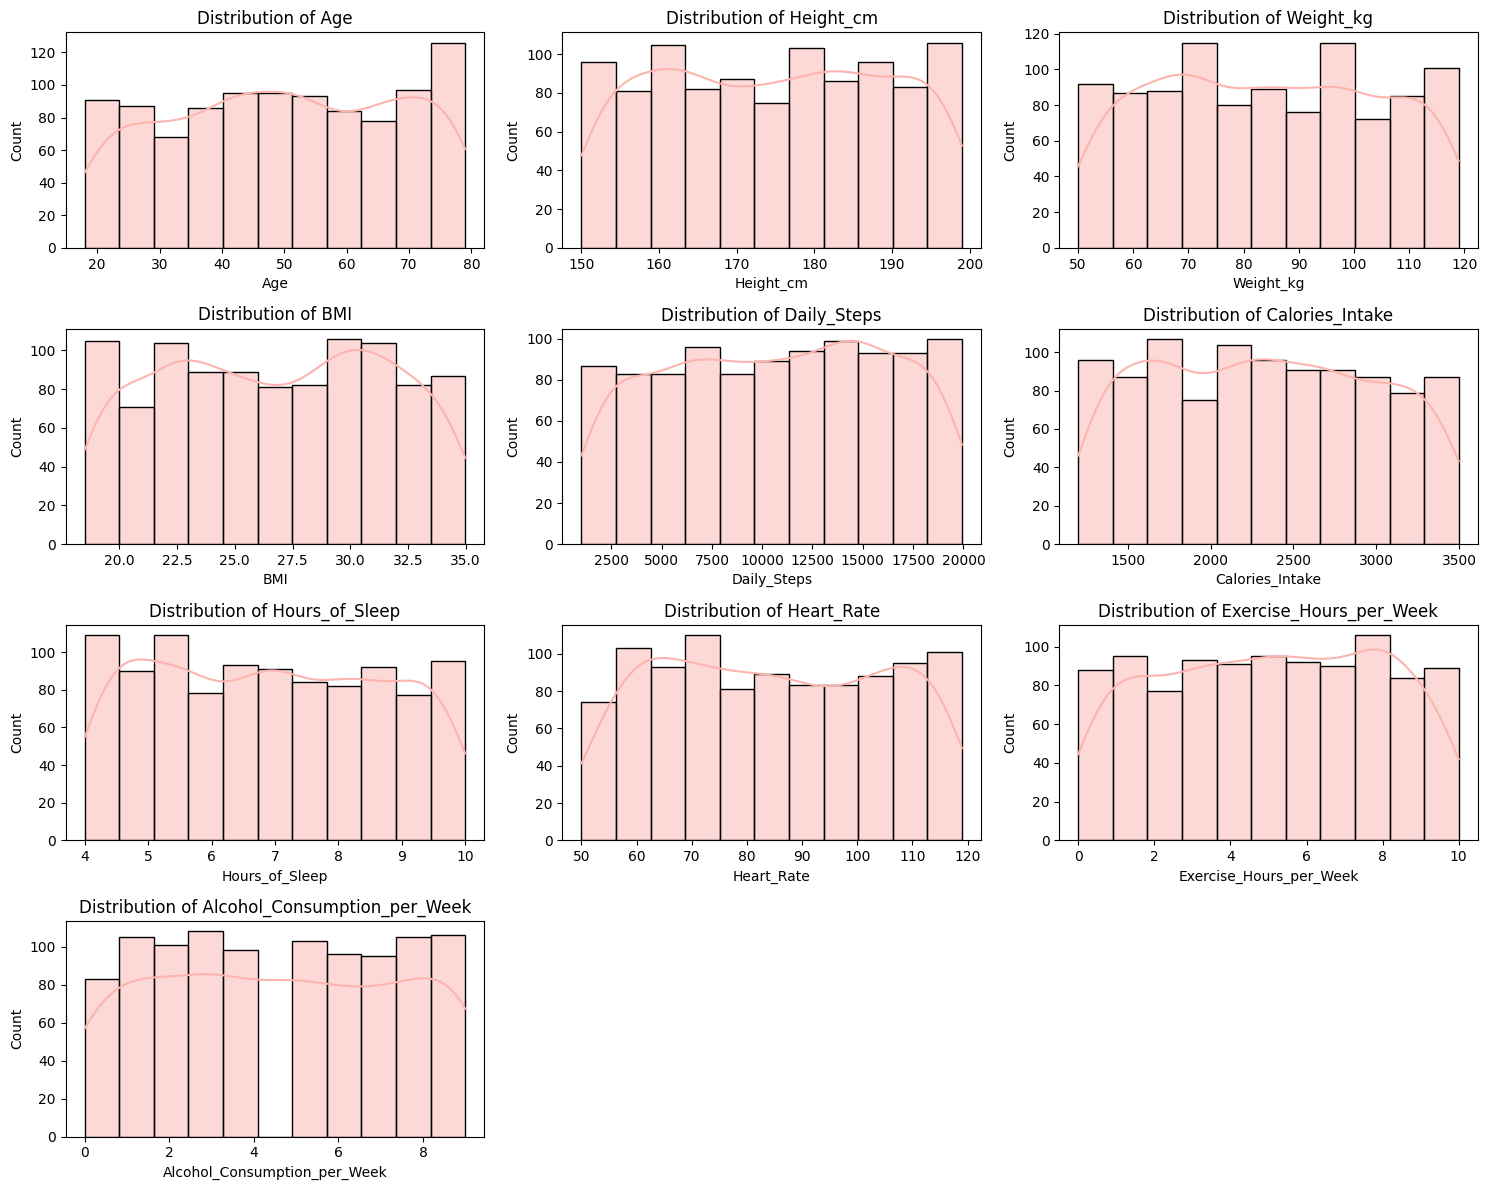

In [128]:
numerical_cols = ['Age', 'Height_cm', 'Weight_kg', 'BMI', 'Daily_Steps',
                  'Calories_Intake', 'Hours_of_Sleep', 'Heart_Rate',
                  'Exercise_Hours_per_Week', 'Alcohol_Consumption_per_Week']

plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


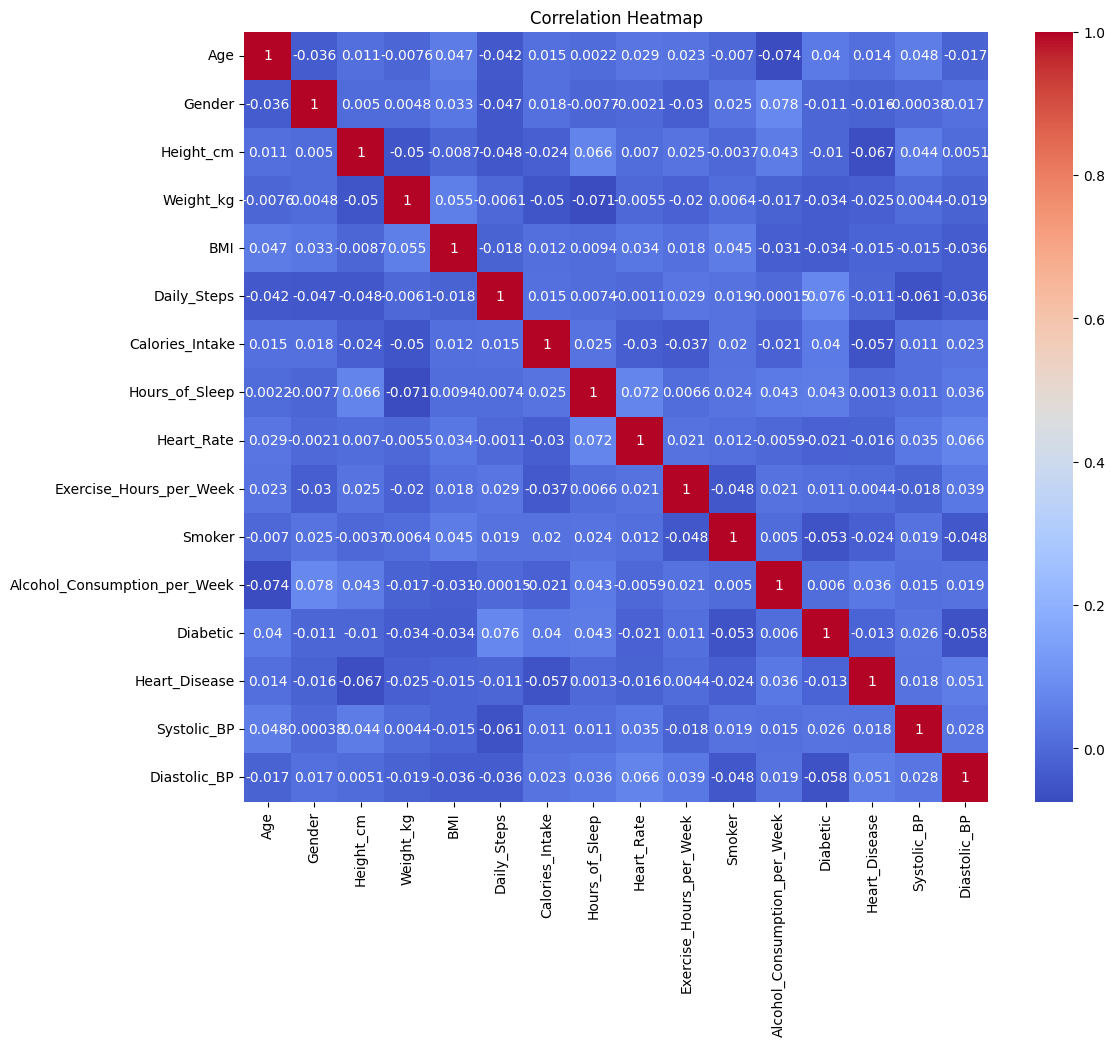

In [129]:
# Encode categorical kolom dulu untuk korelasi numerik
df_encoded = df.copy()
df_encoded['Gender'] = df_encoded['Gender'].map({'Male': 0, 'Female': 1})
for col in ['Smoker', 'Diabetic', 'Heart_Disease']:
    df_encoded[col] = df_encoded[col].map({'No': 0, 'Yes': 1})

# Pecah tekanan darah
df_encoded[['Systolic_BP', 'Diastolic_BP']] = df_encoded['Blood_Pressure'].str.split('/', expand=True).astype(float)
df_encoded = df_encoded.drop(columns=['Blood_Pressure']) # Drop kolom Blood_Pressure yang asli
# Korelasi
plt.figure(figsize=(12,10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [130]:
# sns.set_palette("Pastel1")

# plt.figure(figsize=(10, 6))

# sns.pairplot(df)

# plt.suptitle('Pair Plot for DataFrame')
# plt.show()

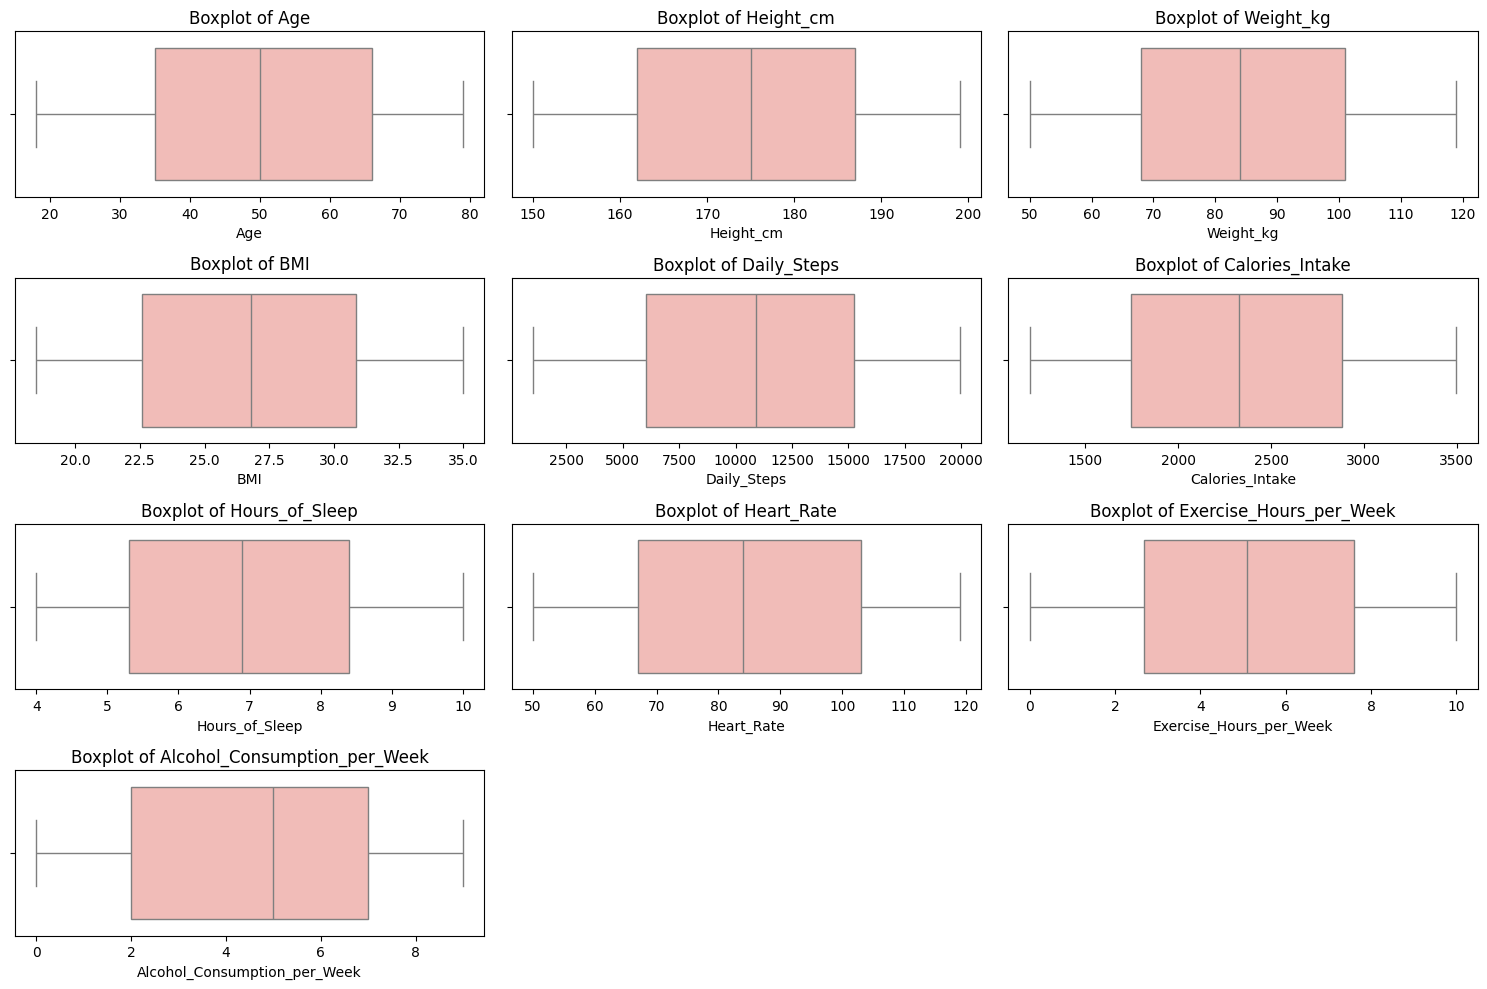

In [131]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


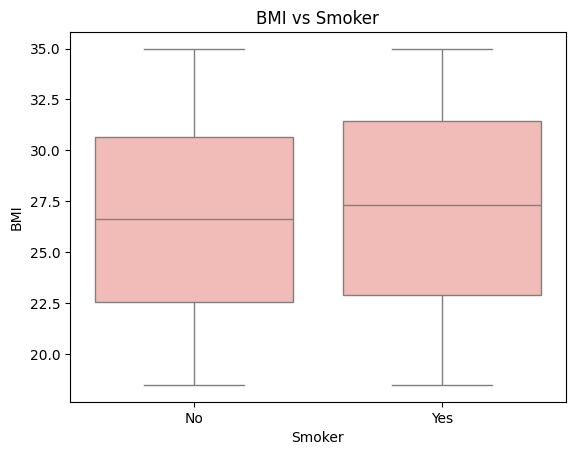

In [132]:
sns.boxplot(data=df, x='Smoker', y='BMI')
plt.title('BMI vs Smoker')
plt.show()


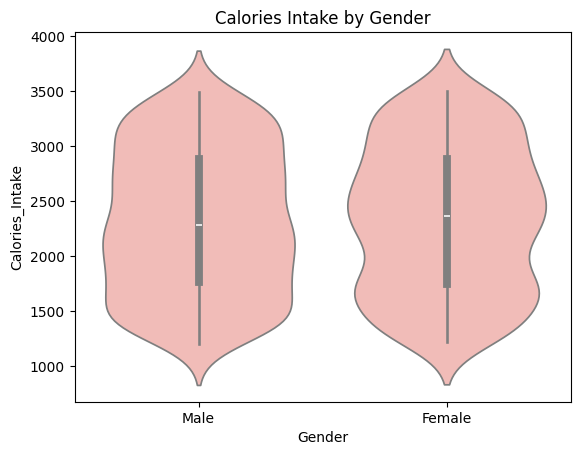

In [133]:
sns.violinplot(data=df, x='Gender', y='Calories_Intake')
plt.title('Calories Intake by Gender')
plt.show()


In [134]:
print(df)

     Age  Gender  Height_cm  Weight_kg    BMI  Daily_Steps  Calories_Intake  \
0     56    Male        164         81  30.72         5134             1796   
1     69    Male        156         82  20.86        12803             1650   
2     46  Female        158         65  30.93        16408             1756   
3     32    Male        197         87  31.19        18420             2359   
4     60    Male        157         63  29.37        17351             2556   
..   ...     ...        ...        ...    ...          ...              ...   
995   18    Male        179        116  31.67        10095             2667   
996   35  Female        170        114  23.88        11361             2351   
997   49  Female        169         85  23.44         9531             2416   
998   64    Male        155         74  22.34         5270             2080   
999   66  Female        171         86  20.64        10906             1284   

     Hours_of_Sleep  Heart_Rate Blood_Pressure  Exe

# data Prepocessing

In [135]:
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood_Pressure'].str.split('/', expand=True).astype(float)
df = df.drop(columns=['Blood_Pressure'])


In [136]:
from sklearn.preprocessing import OneHotEncoder

le = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # sparse=False for array output
for col in ['Gender', 'Smoker', 'Diabetic', 'Heart_Disease']:
    # Reshape the column to a 2D array before encoding
    encoded_data = le.fit_transform(df[[col]])
    # Create new columns for encoded features
    encoded_df = pd.DataFrame(encoded_data, columns=le.get_feature_names_out([col]))
    # Concatenate encoded features to original DataFrame
    df = pd.concat([df, encoded_df], axis=1)
    # Drop original column
    df = df.drop(columns=[col])
df

,Age,Height_cm,Weight_kg,BMI,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Exercise_Hours_per_Week,Alcohol_Consumption_per_Week,Systolic_BP,Diastolic_BP,Gender_Female,Gender_Male,Smoker_No,Smoker_Yes,Diabetic_No,Diabetic_Yes,Heart_Disease_No,Heart_Disease_Yes
0,56,164,81,30.72,5134,1796,8.6,102,8.1,7,137.0,72.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,69,156,82,20.86,12803,1650,4.5,103,3.7,7,129.0,65.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,46,158,65,30.93,16408,1756,4.3,74,3.2,0,127.0,68.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,32,197,87,31.19,18420,2359,4.1,116,8.5,5,125.0,86.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,60,157,63,29.37,17351,2556,5.1,111,8.5,8,100.0,64.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,18,179,116,31.67,10095,2667,4.6,79,6.3,5,108.0,63.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
996,35,170,114,23.88,11361,2351,7.2,54,2.9,3,98.0,75.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
997,49,169,85,23.44,9531,2416,4.5,80,7.6,4,125.0,65.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
998,64,155,74,22.34,5270,2080,5.8,101,5.4,4,129.0,86.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [137]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[0.62295082, 0.28571429, 0.44927536, ..., 0.        , 1.        ,
        0.        ],
       [0.83606557, 0.12244898, 0.46376812, ..., 0.        , 1.        ,
        0.        ],
       [0.45901639, 0.16326531, 0.2173913 , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.50819672, 0.3877551 , 0.50724638, ..., 0.        , 1.        ,
        0.        ],
       [0.75409836, 0.10204082, 0.34782609, ..., 0.        , 1.        ,
        0.        ],
       [0.78688525, 0.42857143, 0.52173913, ..., 0.        , 1.        ,
        0.        ]])

# build model

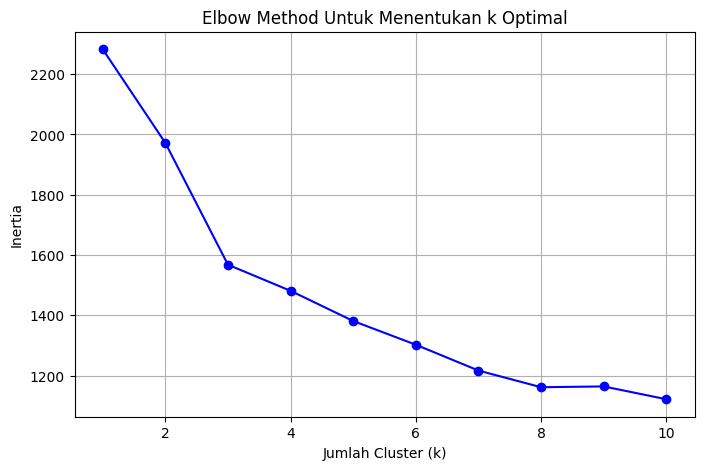

In [138]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Coba beberapa jumlah cluster (misalnya 1-10)
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method Untuk Menentukan k Optimal')
plt.grid(True)
plt.show()


In [143]:
# Terapkan KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

# Convert df_scaled back to a Pandas DataFrame to easily add a column
df_clustered = pd.DataFrame(df_scaled, columns=df.columns)
df_clustered['Cluster'] = cluster_labels

# Lihat distribusi cluster
print(df_clustered['Cluster'].value_counts())


Cluster
1    428
2    381
0    191
Name: count, dtype: int64


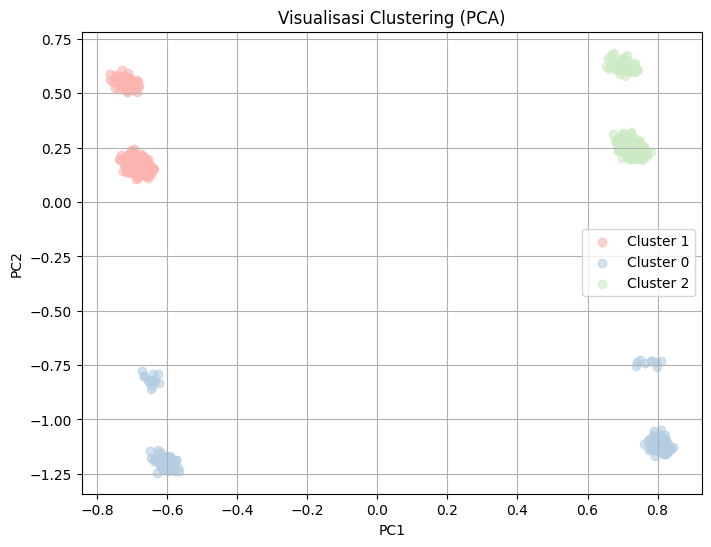

In [144]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
# Convert df_scaled back to DataFrame before using drop
df_scaled_df = pd.DataFrame(df_scaled, columns=df.columns)
# Add the 'Cluster' column to df_scaled_df
df_scaled_df['Cluster'] = cluster_labels  # Assuming cluster_labels is already defined from KMeans
reduced = pca.fit_transform(df_scaled_df.drop('Cluster', axis=1))
reduced_df = pd.DataFrame(reduced, columns=['PC1', 'PC2'])
reduced_df['Cluster'] = df_scaled_df['Cluster']  # Access 'Cluster' from df_scaled_df

# Plot
plt.figure(figsize=(8, 6))
for cluster in reduced_df['Cluster'].unique():
    subset = reduced_df[reduced_df['Cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster}', alpha=0.6)
plt.title('Visualisasi Clustering (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

In [145]:
# prompt: skor silhouette dari pca

from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(df_scaled_df.drop('Cluster', axis=1), df_scaled_df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.2216776441675587


In [142]:
from sklearn.metrics import silhouette_score

# Use df_scaled_df which is a DataFrame
score = silhouette_score(df_scaled_df.drop('Cluster', axis=1), df_scaled_df['Cluster'])
print(f'Silhouette Score: {score:}')

Silhouette Score: 0.20513856333887975
